In [2]:
%matplotlib notebook
# import mpld3
# mpld3.enable_notebook()

import pandas as pd
import os
import re
import sys
from pprint import pprint
import matplotlib.pyplot as plt
from math import *

from cycler import cycler

plt.ion()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.rcParams['figure.figsize'] = [10, 8]

In [12]:
def aggregate_tensorflow_results(path, filename_regex):
    files = [f for f in os.listdir(path) if re.match(filename_regex, f)]
    print(files)
    pprint(os.listdir(path))

    progress_data = []
    for f in files:
        d = os.path.join(path, f)
        for f in os.listdir(d):
            progress_filename = os.path.join(d, f, 'progress.csv')
            try:
                p = pd.read_csv(progress_filename)
                progress_data.append(p)
            except:
                pass
    print('Loaded ' + str(len(progress_data)) + ' files.')
    # for p in progress_data:
    #     print(p.head())

    # reward mean / training_iteration (or timesteps_total)

    columns = {}
    for p in progress_data:
        for c in p.columns:
            columns[c] = c

    aggregated_columns = {}
    for column in columns.keys():
        df = pd.DataFrame()
        for i, p in enumerate(progress_data):
            df[i] = p[column]
        aggregated_columns[column] = df
        
    return aggregated_columns

def smooth_aggregated_column(aggregated_column, window_size):
    print('ws ', window_size)
    return aggregated_column.rolling(window=window_size,axis=0).mean()
    


In [4]:
def plot_quantiles(x, aggregated_column, color=(0,0,.8), alpha=.15):
    plt.plot(x, aggregated_column.quantile(.5, 1), color=color)
    q1 = aggregated_column.quantile(.33, 1).values.tolist()
    q2 = aggregated_column.quantile(.67, 1).values.tolist()
    print(type(q1), type(q2), type(x))
    plt.fill_between(x, q1, q2, color=(*color, alpha))

def plot_smooth_quantiles(x, aggregated_column, window_size=5, **kwargs):
    plot_quantiles(x, smooth_aggregated_column(aggregated_column, window_size), **kwargs)
    
def make_iteration_array(aggregated_columns):
    return aggregated_columns['training_iteration'].max(1).values.tolist()

def plot_smooth_quantiles_by_iteration(aggregated_columns, column_name, **kwargs):
    if len(aggregated_columns) > 0:
        plot_smooth_quantiles(make_iteration_array(aggregated_columns), aggregated_columns[column_name], **kwargs)

In [14]:
# waypoint_nums = [1,2,5,10,20]
# waypoint_nums = [1, 2, 5, 7, 10, 15, 20]

# results_path = '/home/ctripp/mount/hpc_cavs/r1/standard/'
results_path = '/home/ctripp/ray_results/test/'

wps = {0: aggregate_tensorflow_results(results_path, r'test_.*$')}

# wps = {w : aggregate_tensorflow_results(results_path, str(w) + r'test_.*$') \
#        for i, w in enumerate(waypoint_nums)}

# wpsd = [aggregate_tensorflow_results('/home/ctripp/mount/hpc_cavs/r1/standard/', str(i) + r'_\d+_waypoint_use_distances') \
#        for i in waypoint_nums]

['test_2020-02-27_16-15-10ieq2sfnh', 'test_2020-02-27_15-49-30fshjls7z', 'test_2020-02-27_15-58-20c1qres8f', 'test_2020-02-27_15-56-59y_0gbzcq']
['.directory',
 'test_2020-02-27_16-15-10ieq2sfnh',
 'test',
 'test_2020-02-27_15-49-30fshjls7z',
 'experiment_state-2020-02-27_15-56-59.json',
 'experiment_state-2020-02-27_15-58-20.json',
 'test_2020-02-27_15-58-20c1qres8f',
 'test_2020-02-27_15-56-59y_0gbzcq',
 'experiment_state-2020-02-27_15-49-30.json',
 'experiment_state-2020-02-27_16-15-10.json']
Loaded 0 files.


0 5 0.0 0.0 0.0 1.0
ws  5


<IPython.core.display.Javascript object>


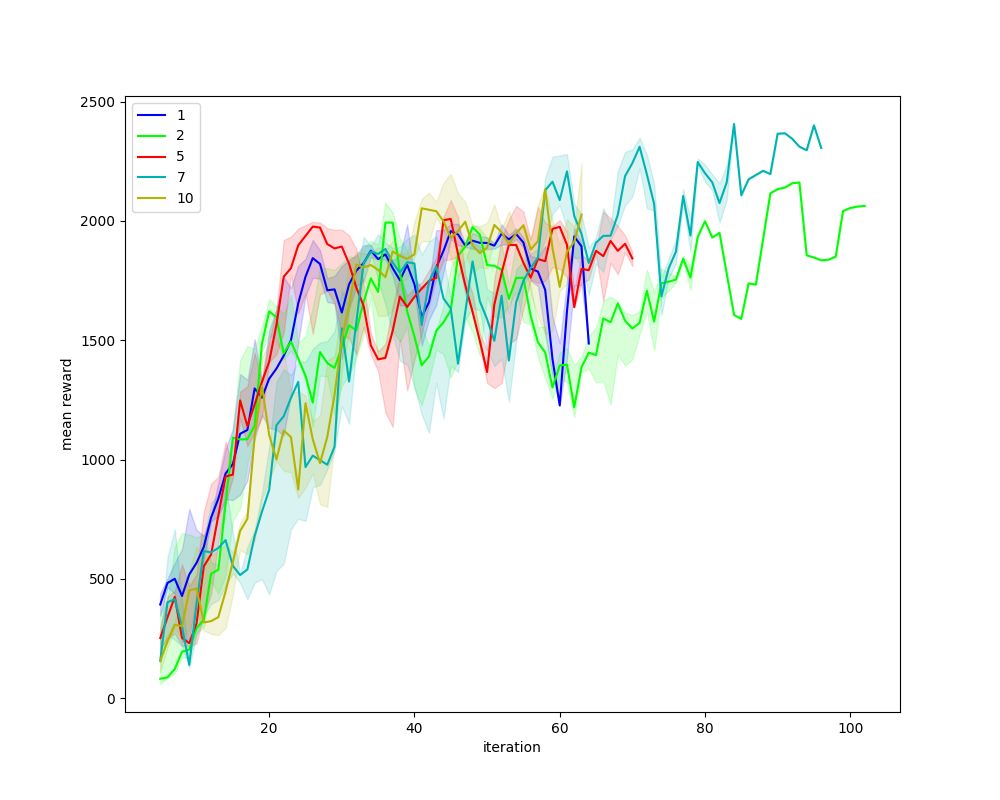

<class 'list'> <class 'list'> <class 'list'>
1 5 0.25 0.0 0.0 0.5
ws  5
<class 'list'> <class 'list'> <class 'list'>
2 5 0.5 0.0 1.0 0.0
ws  5
<class 'list'> <class 'list'> <class 'list'>
3 5 0.75 0.5 0.0 0.0
ws  5
<class 'list'> <class 'list'> <class 'list'>
4 5 1.0 1.0 0.0 0.0
ws  5
<class 'list'> <class 'list'> <class 'list'>


Text(0, 0.5, 'mean reward')

In [146]:
num = len(waypoint_nums)
legend = []
# nums = {1, 2, 5, 7, 10, 15, 20}
nums = [1, 2, 5, 7, 10]

colors = [
    (0.0,0.0,1.0),
    (0.0,1.0,0.0),
    (1.0,0.0,0.0),
    (0.0,0.7,0.7),
    (0.7,0.7,0.0),
    (0.0,0.0,0.0),
    (0.5,0.5,0.5),
]
# default_cycler = (cycler(color=list('rgbkmcy')))
# plt.rc('axes', prop_cycle=default_cycler)

for i, num in enumerate(nums):
    if num not in wps:
        continue
    data = wps[num]
    p = 0 if len(nums) == 0 else (i) / (len(nums) - 1)
#     r = (1-abs(p-.5)/.5)
    r = max(0.0, p*2 -1)
    b = max(0.0, (1 - p)*2 - 1)
    g = max(0.0, 2*(1-abs(p-.5)/.5) - 1)
#     g = 0
    print(i, len(nums), p, r,g,b)
#     plot_smooth_quantiles_by_iteration(data, 'episode_reward_mean', color=(r,g,b))
    plot_smooth_quantiles_by_iteration(data, 'episode_reward_mean', color=colors[i])
    legend.append(str(num))

# for i in range(num):
#     r = 0 if num == 0 else 1 - i / (num - 1)
#     plot_smooth_quantiles_by_iteration(wpsd[i], 'episode_reward_mean', color=(r,0.0,1.0))
#     legend.append(str(waypoint_nums[i]) + 'd')
    
plt.legend(legend)
plt.xlabel('iteration')
plt.ylabel('mean reward')
    
# wp5x = make_iteration_array(wp5)
# wp10x = make_iteration_array(wp10)
# wp5dx = make_iteration_array(wp5d)
# wp10dx = make_iteration_array(wp10d)

# plot_smooth_quantiles(wp5x, wp5['episode_reward_mean'],color=(0.0, 1.0, 0.0))
# plot_smooth_quantiles(wp10x, wp10['episode_reward_mean'],color=(0.0, 0.5, 0.0))
# plot_smooth_quantiles(wp5dx, wp5d['episode_reward_mean'],color=(0.0, 0.0, 1.0))
# plot_smooth_quantiles(wp10dx, wp10d['episode_reward_mean'],color=(0.0, 0.0, 0.5))
# plt.figure()

# plot_smooth_quantiles(wp5x, wp5['episode_len_mean'],color=(0.0, 0.0, 1.0))
# plot_smooth_quantiles(wp10x, wp10['episode_len_mean'],color=(0.0, 1.0, 0.0))
# plot_smooth_quantiles(wp5dx, wp5d['episode_len_mean'],color=(1.0, 0.0, 0.0))
# plot_smooth_quantiles(wp10dx, wp10d['episode_len_mean'],color=(0.5, 0.0, 0.5))



In [38]:
# waypoint_nums = [1,2,5,10,20]
waypoint_nums = [1,2,5, 7, 10, 15, 20, 25, 30]

wps = [aggregate_tensorflow_results('/home/ctripp/mount/hpc_cavs/r1/standard/', str(i) + r'_\d+_waypoint_no_distances') \
       for i in waypoint_nums]

wpsd = [aggregate_tensorflow_results('/home/ctripp/mount/hpc_cavs/r1/standard/', str(i) + r'_\d+_waypoint_use_distances') \
       for i in waypoint_nums]

Loaded 21 files.
Loaded 25 files.
Loaded 24 files.
Loaded 49 files.
Loaded 44 files.
Loaded 27 files.
Loaded 23 files.
Loaded 25 files.
Loaded 23 files.
Loaded 20 files.
Loaded 23 files.
Loaded 23 files.
Loaded 0 files.
Loaded 22 files.
Loaded 0 files.
Loaded 21 files.
Loaded 0 files.
Loaded 0 files.


ws  20


<IPython.core.display.Javascript object>


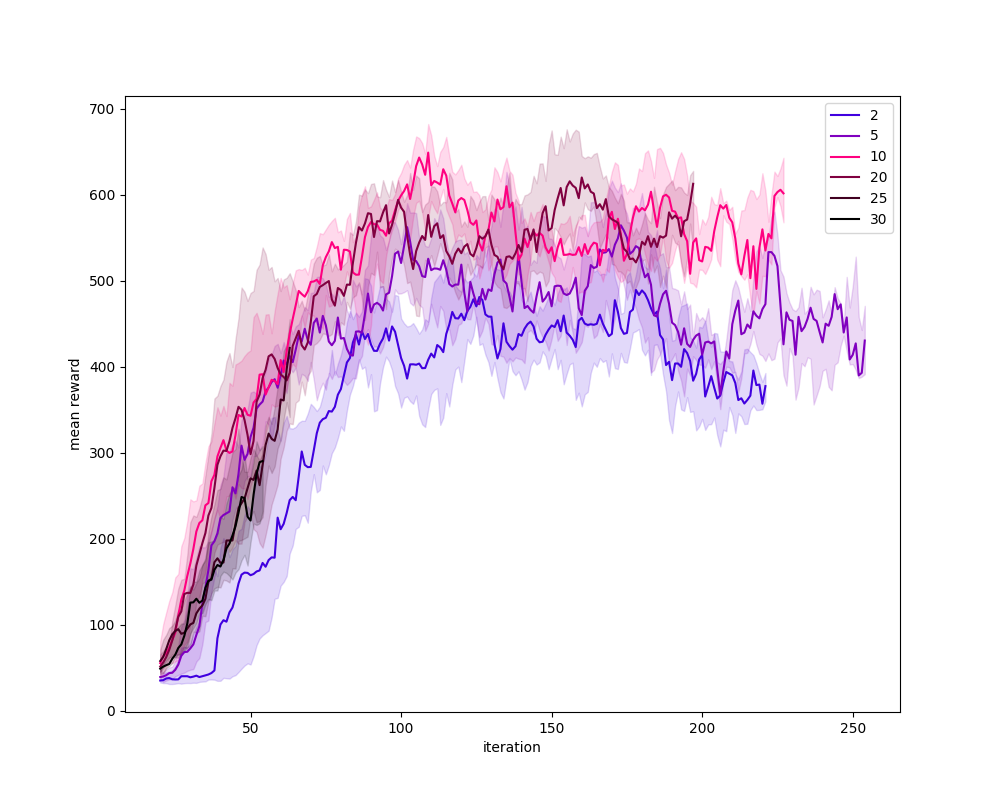

<class 'list'> <class 'list'> <class 'list'>
ws  20
<class 'list'> <class 'list'> <class 'list'>
ws  20
<class 'list'> <class 'list'> <class 'list'>
ws  20
<class 'list'> <class 'list'> <class 'list'>
ws  20
<class 'list'> <class 'list'> <class 'list'>
ws  20
<class 'list'> <class 'list'> <class 'list'>


Text(0, 0.5, 'mean reward')

In [39]:
num = len(waypoint_nums)
legend = []
nums = {2, 5, 10, 20, 25, 30}
for i in range(num):
    if waypoint_nums[i] not in nums:
        continue
    p = 0 if i == 0 else i / (num - 1)
    r = (1-abs(p-.5)/.5)
    b = (1-p)
    plot_smooth_quantiles_by_iteration(wps[i], 'episode_reward_mean', color=(r,0,b))
    legend.append(str(waypoint_nums[i]))

# for i in range(num):
#     r = 0 if num == 0 else 1 - i / (num - 1)
#     plot_smooth_quantiles_by_iteration(wpsd[i], 'episode_reward_mean', color=(r,0.0,1.0))
#     legend.append(str(waypoint_nums[i]) + 'd')
    
plt.legend(legend)
plt.xlabel('iteration')
plt.ylabel('mean reward')
    
# wp5x = make_iteration_array(wp5)
# wp10x = make_iteration_array(wp10)
# wp5dx = make_iteration_array(wp5d)
# wp10dx = make_iteration_array(wp10d)

# plot_smooth_quantiles(wp5x, wp5['episode_reward_mean'],color=(0.0, 1.0, 0.0))
# plot_smooth_quantiles(wp10x, wp10['episode_reward_mean'],color=(0.0, 0.5, 0.0))
# plot_smooth_quantiles(wp5dx, wp5d['episode_reward_mean'],color=(0.0, 0.0, 1.0))
# plot_smooth_quantiles(wp10dx, wp10d['episode_reward_mean'],color=(0.0, 0.0, 0.5))
# plt.figure()

# plot_smooth_quantiles(wp5x, wp5['episode_len_mean'],color=(0.0, 0.0, 1.0))
# plot_smooth_quantiles(wp10x, wp10['episode_len_mean'],color=(0.0, 1.0, 0.0))
# plot_smooth_quantiles(wp5dx, wp5d['episode_len_mean'],color=(1.0, 0.0, 0.0))
# plot_smooth_quantiles(wp10dx, wp10d['episode_len_mean'],color=(0.5, 0.0, 0.5))

